In [2]:
import sys
import os

# Add the project root (parent folder) to Python's import path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
import yfinance as yf
import pandas as pd

# Download AAPL daily prices from 2018 onwards
df = yf.download("AAPL", start="2018-01-01")

# Flatten multi-level columns (yfinance returns multi-level columns for single ticker)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)

# Reset index so 'Date' becomes a column
df = df.reset_index()

# Save to your data/raw folder
df.to_csv("../data/raw/aapl.csv", index=False)

df.head()

/var/folders/sv/d91pqqms73g28qthd6bjk8sh0000gn/T/ipykernel_1368/3038940736.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2018-01-01")
[*********************100%***********************]  1 of 1 completed



Price,Date,Close,High,Low,Open,Volume
0,2018-01-02,40.341881,40.351250,39.639305,39.850080,102223600
1,2018-01-03,40.334866,40.878192,40.271636,40.405124,118071600
2,2018-01-04,40.522213,40.625258,40.299731,40.407458,89738400
3,2018-01-05,40.983585,41.070235,40.526912,40.618247,94640000
4,2018-01-08,40.831345,41.126425,40.732981,40.831345,82271200


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
print("Pandas version:", pd.__version__)


Matplotlib is building the font cache; this may take a moment.


Pandas version: 2.3.3


In [4]:
from src.data_loading import load_raw_series
import matplotlib.pyplot as plt

series = load_raw_series("aapl.csv", value_col="Close")
series.head()


Date
2018-01-02    40.341881
2018-01-03    40.334866
2018-01-04    40.522213
2018-01-05    40.983585
2018-01-08    40.831345
Name: Close, dtype: float64

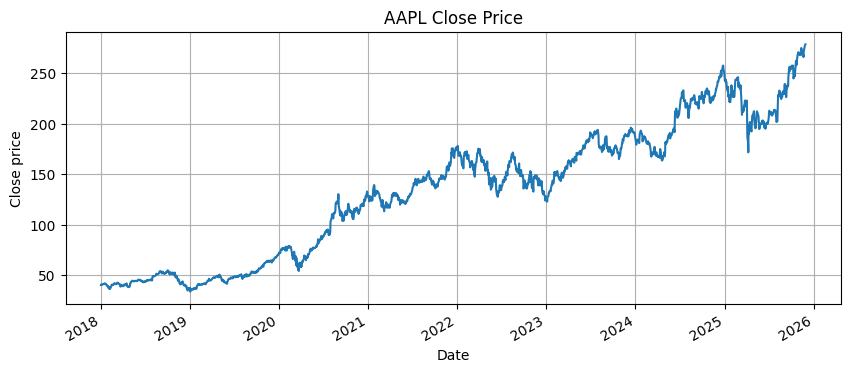

In [6]:
plt.figure(figsize=(10, 4))
series.plot()
plt.title("AAPL Close Price")
plt.xlabel("Date")
plt.ylabel("Close price")
plt.grid(True)
plt.show()

In [5]:
series.describe()

count    1989.000000
mean      133.959113
std        65.511127
min        33.799675
25%        64.078972
50%       142.411728
75%       181.111511
max       278.850006
Name: Close, dtype: float64

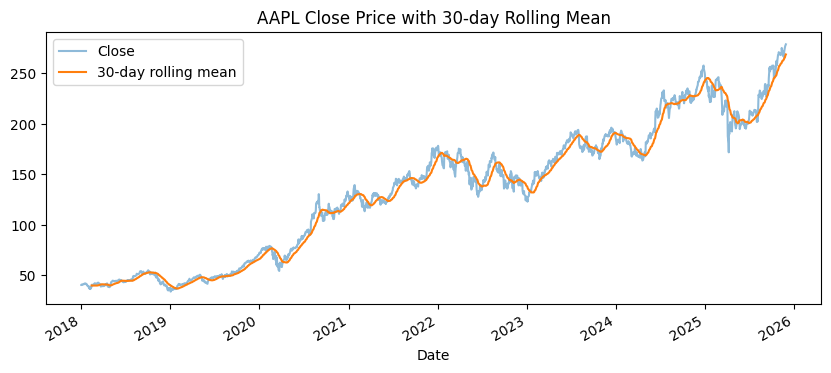

In [7]:
roll30 = series.rolling(window=30).mean()

plt.figure(figsize=(10, 4))
series.plot(alpha=0.5, label="Close")
roll30.plot(label="30-day rolling mean")
plt.legend()
plt.title("AAPL Close Price with 30-day Rolling Mean")
plt.show()